In [1]:
# Copyright 2024 Keysight Technologies Inc.

In [2]:
import matplotlib.pyplot as plt
import trueq as tq

# Define a device configuration
config = tq.Config.from_yaml(
    """
    Mode: ZXZXZ
    Gates:
      - Z:
          Hamiltonian:
          - ['Z', 'phi']
      - X90:
          Hamiltonian:
          - ['X', 90]
      - CNOT:
          Matrix:
          - [1, 0, 0, 0]
          - [0, 1, 0, 0]
          - [0, 0, 0, 1]
          - [0, 0, 1, 0]
    """
)

In [3]:
transpiler = tq.Compiler.from_config(config)

In [4]:
# Define a circuit
circuit = tq.Circuit([{(0, 1): tq.Gate.swap}])
circuit.draw()

DisplayWrapper(<svg xmlns="http://w...)

In [5]:
transpiled_circuit = transpiler.compile(circuit)
transpiled_circuit.draw()

DisplayWrapper(<svg xmlns="http://w...)

In [6]:
swap_op = tq.Gate.swap.mat
transpiled_op = tq.Simulator().operator(transpiled_circuit).mat()

print("Process Infidelity: ", tq.math.proc_infidelity(swap_op, transpiled_op))

Process Infidelity:  4.440892098500626e-16


Text(0.5, 1.0, 'SWAP Gate expressed through native gates')

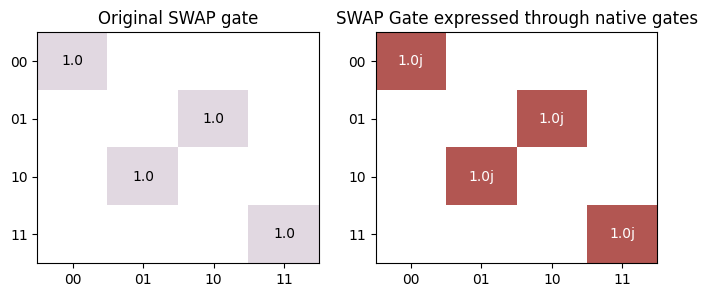

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

tq.plot_mat(swap_op, ax=ax1)
tq.plot_mat(transpiled_op, ax=ax2)

ax1.set_title("Original SWAP gate")
ax2.set_title("SWAP Gate expressed through native gates")